# **AT1- Kaggle Competition Week 3: Advance MLA - Part A**
## Logistic regression with only numeric features - transformed height into inches. 
Experiment: We saw that removing/dropping some features is not aiding towards higher AUCROC score. In this experiment, we will take all numerical features into account and convert date formatted height into inches. 


## 1. Load Dataset



**[1.1]** Launch magic commands to automatically reload modules

In [1]:
%load_ext autoreload
%autoreload 2

**[1.2]** Import the pandas and numpy package

In [2]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**[1.3]** Load the dataset into dataframe called df_train

In [3]:
df_train = pd.read_csv('../data/raw/train.csv')

In [4]:
# Reading test data into df_test
df_test = pd.read_csv('../data/raw/test.csv')

## 2. Prepare Data

**[2.1]** Create a copy of df and save it into a variable called df_cleaned

In [5]:
df_cleaned = df_train.copy()

**[2.2]** Check duplicate values 

In [6]:
#check for any duplicate rows in df
print(df_cleaned.duplicated(subset=['player_id']).sum())

32162


**[2.3]** Remove Duplicates

In [7]:
df_cleaned = df_cleaned.loc[~df_cleaned.duplicated(['player_id']), :]

In [8]:
# check for duplicates after
print(df_cleaned.duplicated(subset=['player_id']).sum())

0


In [9]:
#reset the index with respect to the number of rows 
df_cleaned.reset_index(inplace=True, drop=True) 

In [10]:
# removing features with more than 15% missing values
df_cleaned = df_cleaned.drop(['player_id','team','num','conf','yr', 'type'], axis=1) 

In [11]:
df_cleaned.shape

(23929, 58)

In [12]:
# copying test data into a separate dataframe
df_test_clean = df_test.copy()

#### We need to remove the same columns from the test set and perform label encoding and scaling as we did for train set in order to evaluate the model

In [13]:
df_test_clean = df_test_clean.drop(['player_id','team','num','conf','yr', 'type'], axis=1)

**[2.4]** Replace `NaN` values with 0

In [14]:
# Replace NaN values with 0
df_cleaned = df_cleaned.fillna(0)
df_test_clean = df_test_clean.fillna(0)

**[2.5]** Convert the column `ht` from date format to numerical and save it into variable called `ht_inch`by calling the function `convert_height_numeric()` from `transfrom_data.py`

In [15]:
import sys
sys.path.append('../src/data')

# importing the defined function from src folder
from transform_data import convert_height_numeric

# call the function
df_cleaned['ht_inch'] = df_cleaned['ht'].apply(convert_height_numeric)
df_test_clean['ht_inch'] = df_test_clean['ht'].apply(convert_height_numeric)

In [16]:
# drop original wrong format height column
df_cleaned.drop(['ht'],axis=1,inplace=True)
df_test_clean.drop(['ht'],axis=1,inplace=True)

In [17]:
df_cleaned.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted,ht_inch
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0.0,74
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0.0,76
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0.0,76
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0.0,76
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0.0,80


In [18]:
df_cleaned.to_csv('../data/interim/df_train_cleaned.csv', index = False)
df_test_clean.to_csv('../data/interim/df_test_cleaned.csv', index = False)

**[2.6]** Extract the column `drafted` and save it into variable called `target`

In [18]:
target = df_cleaned.pop('drafted')

## 3. Preprocess data

**[3.1]** Create a list named `num_cols` containing the names of numerical columns

In [23]:
num_cols = list(df_cleaned.select_dtypes('number').columns)

**[3.2]** Import StandardScaler from sklearn.preprocessing, Instantiate the StandardScaler.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

**[3.3]** Fit and apply the scaling on `df_cleaned`

In [26]:
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

In [27]:
df_test_clean[num_cols] = scaler.transform(df_test_clean[num_cols])

In [28]:
df_cleaned.shape, df_test_clean.shape

((23929, 57), (4970, 57))

In [29]:
from joblib import dump

**[3.4]** Save the scaler into the folder `models` as `scaler.joblib`

In [30]:
dump(scaler, '../models/scaler_w3a.joblib')

['../models/scaler_w3a.joblib']

## 4. Split Dataset

**[4.1]** import train_test_split from sklearn.model_selection

In [31]:
from sklearn.model_selection import train_test_split

**[4.2]** Split the train data into training & validation. Split the data to create unbiased splits with the number ratio of 1's and 0's in the target

In [32]:
X_train, X_val, y_train, y_val = train_test_split(
                                            df_cleaned, target, \
                                            test_size=0.3, random_state=23, \
                                            stratify = target, shuffle = True)

**[4.3]** Print the dimensions of `X_train`, `X_val`, `X_test`

In [33]:
print(X_train.shape)
print(X_val.shape)
print(df_test_clean.shape)

(16750, 57)
(7179, 57)
(4970, 57)


**[4.4]** Print the dimensions of `y_train`, `y_val`

In [34]:
print(y_train.shape)
print(y_val.shape)

(16750,)
(7179,)


**[4.5]** Save the sets into the folder `data/processed`

In [ ]:
# make directory to save week 3a data files
%mkdir '../data/processed/week_3a'

In [35]:
X_train.to_csv('../data/processed/week_3a/X_train.csv', index=False)
X_val.to_csv('../data/processed/week_3a/X_val.csv', index=False)
y_train.to_csv('../data/processed/week_3a/y_train.csv', index=False)
y_val.to_csv('../data/processed/week_3a/y_val.csv', index=False)
df_test_clean.to_csv('../data/processed/week_3a/test.csv', index=False)

## 5. Train classifier

**[5.1]** Import LogisticRegression from sklearn, initiate the class and fit the model

In [36]:
# import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter = 4000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [37]:
# import roc_auc_score from sklearn metrics
from sklearn.metrics import roc_curve, roc_auc_score

**[5.2]** Generate probabilities for `X_val` and save it in `y_val_pred_lr`

In [38]:
y_val_pred_lr = lr.predict_proba(X_val)[:,1]
auc_roc_lr = roc_auc_score(y_val, y_val_pred_lr)
print(f"AUC-ROC Score for logistic regression: {auc_roc_lr}")

AUC-ROC Score for logistic regression: 0.9964122877159908


**[5.3]** Get false positive rate and true positive rate and save it in fpr, tpr

In [39]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_lr)

**[5.4]** Import plot_roc_curve from sklearn.metrics

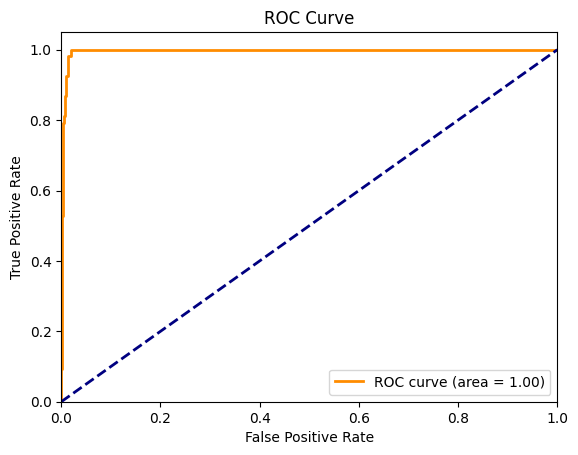

In [40]:
# Plot ROC curve
# source - https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**[5.5]** Save the logistic regression model

In [41]:
dump(lr, '../models/log_reg_week3a.joblib')

['../models/log_reg_week3a.joblib']